In [1]:
from pycqed import *
from pycqed import physical_constants as pc

Here we simply reproduce the results from [this](http://antonpotocnik.com/?p=560257) website:

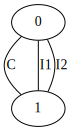

In [2]:
graph = CircuitGraph()
graph.addBranch(0, 1, "C")
graph.addBranch(0, 1, "I1")
graph.addBranch(0, 1, "I2")
graph.drawGraphViz()

In [3]:
circuit = SymbolicSystem(graph)
circuit.getQuantumHamiltonian()

Optimal basis representations for the circuit coordinates:
{1: 'charge'}


Matrix([[-0.5*I_{1}*(D^{\dagger}_{1} + D_{1}) - 0.5*I_{2}*(exp(1.0*I*\phi_{10-2e})*D_{1} + exp(-1.0*I*\phi_{10-2e})*D^{\dagger}_{1}) + 0.5*Q_{1}**2/C_{}]])

In [4]:
hamil = NumericalSystem(circuit)
hamil.configureOperator(1, 40, "charge")
hamil.setParameterValues(
    "C", 64.568, # In fF
    "I1", 16.1132e-3/2, # In uA
    "I2", 16.1132e-3/2, # In uA
    "phi10-2e", 0
)

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


In [5]:
E = hamil.getHamiltonian().eigenenergies()
print("fge =", E[1] - E[0])
print("fef =", E[2] - E[1])
print(E[3] - E[2])

fge = 4.057611555595588
fef = 3.674658652621694
3.344977965766555
